In [1]:
from keras import Sequential
import keras
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Reshape, InputLayer, Dropout
from keras_tqdm import TQDMNotebookCallback

Using TensorFlow backend.


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9


x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set


y = 5 Sandal


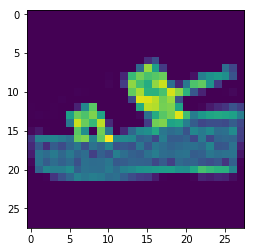

In [4]:
# Image index, you can pick any number between 0 and 59,999
img_index = 12
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

In [5]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [6]:
model = Sequential()
model.add(InputLayer((28, 28)))
model.add(Reshape((28, 28, -1)))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[keras.metrics.categorical_accuracy])

In [9]:
model.fit(x=x_train, y=y_train, epochs=1, batch_size=100, verbose=0,
          validation_split=0.1, callbacks=[TQDMNotebookCallback(leave_inner=True)])

HBox(children=(IntProgress(value=0, description='Training', max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 0', max=54000), HTML(value='')))

In [10]:
model.evaluate(x=x_test, y=y_test)

10000/10000 [==============================] - 3s 275us/step

[0.53258375473022457, 0.81820000000000004]

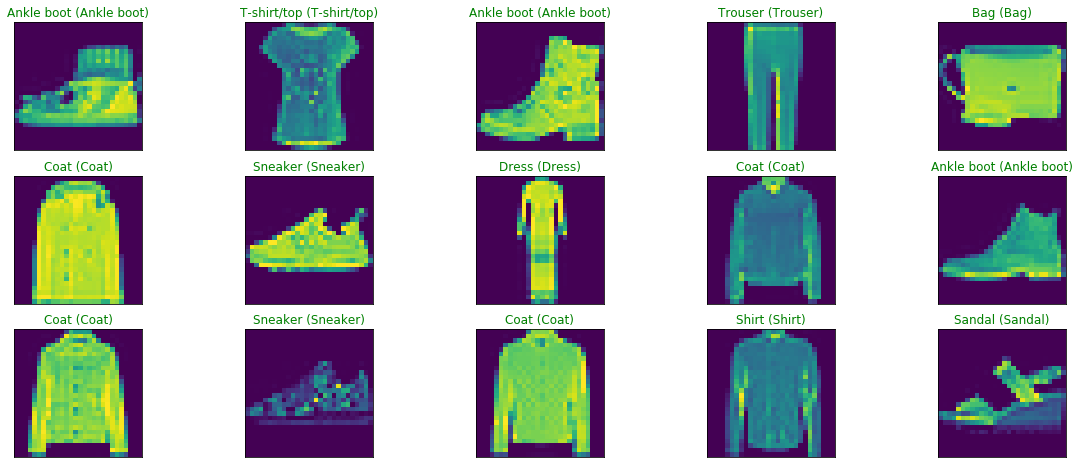

In [11]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

In [12]:
from sklearn.metrics import classification_report
y_test_arg = np.argmax(y_test, axis=1)
y_hat_arg = np.argmax(y_hat, axis=1)

print(classification_report(y_test_arg, y_hat_arg, target_names=fashion_mnist_labels))

             precision    recall  f1-score   support

T-shirt/top       0.72      0.84      0.78      1000
    Trouser       0.98      0.95      0.96      1000
   Pullover       0.73      0.67      0.70      1000
      Dress       0.79      0.88      0.83      1000
       Coat       0.64      0.81      0.71      1000
     Sandal       0.97      0.86      0.92      1000
      Shirt       0.64      0.33      0.43      1000
    Sneaker       0.90      0.91      0.90      1000
        Bag       0.92      0.96      0.94      1000
 Ankle boot       0.89      0.97      0.93      1000

avg / total       0.82      0.82      0.81     10000



In [13]:
# Другая модель:

In [14]:
# Model
model = Sequential()
# Add convolution 2D
model.add(InputLayer((28, 28)))
model.add(Reshape((28, 28, -1)))
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu')
         )

model.add(MaxPool2D())
# Add dropouts to the model
model.add(Dropout(0.25))
model.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPool2D())
# Add dropouts to the model
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
# Add dropouts to the model
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# Add dropouts to the model
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
model.fit(x=x_train, y=y_train, epochs=1, batch_size=128, verbose=0,
          validation_split=0.1, callbacks=[TQDMNotebookCallback(leave_inner=True)])

HBox(children=(IntProgress(value=0, description='Training', max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 0', max=54000), HTML(value='')))